### Q6. [4 points] Build two uplift models predicting how likely it is that a voter will become more likely to support the Democratic candidate based on the test mailings for message A and message B.

In [235]:
# importing libraries


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [236]:
from causallift import CausalLift

In [237]:
FX_indicators_2020_df = pd.read_csv('FX_indicators_2020.csv')

In [238]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384983,189580,1,55,23,5,0,1,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384984,137630,2,0,29,0,1,1,36,37,35,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N
384985,140246,2,0,68,1,0,0,33,32,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
FX_indicators_2020_df.describe()

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,PRS16_PD,PRS16_PR,MSG_A,MSG_B
count,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,...,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000
mean,318457.590755,2.002221,0.570999,50.864408,1.205781,0.730287,0.618231,39.256326,37.093512,41.493762,...,0.982771,0.044602,0.145909,0.530914,0.534854,12.610530,46.943522,51.377199,0.077829,0.077764
std,183665.590377,0.816945,5.323766,18.141040,1.306398,1.063950,0.950737,6.934079,7.190315,7.296544,...,0.678549,0.330575,0.480255,0.521946,0.537452,1.089046,5.754449,5.814682,0.267902,0.267800
min,2.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.100000,17.000000,0.000000,0.000000
25%,159325.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,32.000000,35.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,42.800000,47.800000,0.000000,0.000000
50%,318561.000000,2.000000,0.000000,51.000000,1.000000,0.000000,0.000000,38.000000,36.000000,41.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,45.800000,52.500000,0.000000,0.000000
75%,477540.000000,3.000000,0.000000,65.000000,2.000000,1.000000,1.000000,44.000000,40.000000,48.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000,50.400000,55.600000,0.000000,0.000000
max,636572.000000,3.000000,100.000000,113.000000,9.000000,9.000000,9.000000,65.000000,65.000000,65.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,16.000000,80.600000,64.300000,1.000000,1.000000


In [240]:
FX_indicators_2020_df.dtypes

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VOTER_ID       int64
SET_NO         int64
OPP_SEX        int64
AGE            int64
HH_ND          int64
               ...  
MOVED_RDMB    object
MOVED_DRMB    object
MOVED_AWMB    object
MOVED_ADMB    object
MOVED_ARMB    object
Length: 152, dtype: object

In [241]:
FX_indicators_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 446.5+ MB


In [242]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 152)
VOTER_ID           0
SET_NO             0
OPP_SEX            0
AGE                0
HH_ND              0
               ...  
MOVED_RDMB    371383
MOVED_DRMB    371383
MOVED_AWMB    371383
MOVED_ADMB    371383
MOVED_ARMB    371383
Length: 152, dtype: int64


In [243]:
FX_indicators_2020_df.isnull().any()

VOTER_ID      False
SET_NO        False
OPP_SEX       False
AGE           False
HH_ND         False
              ...  
MOVED_RDMB     True
MOVED_DRMB     True
MOVED_AWMB     True
MOVED_ADMB     True
MOVED_ARMB     True
Length: 152, dtype: bool

In [244]:
FX_indicators_2020_df.drop(columns = ['CAND1S','CAND2S','MESSAGE'], axis=1, inplace=True)

In [245]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'COMM_LT10':'ED_4COL'].columns, axis = 1)

In [246]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'H_AFDLN3P':'PRS16_PR'].columns, axis = 1)

In [247]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'VG_14_DV':'MOVED_AWMA'].columns, axis = 1)

In [248]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'MOVED_ARMA':'MOVED_AWMB'].columns, axis = 1)

In [249]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(['MOVED_ARMB'], axis = 1)

In [250]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M,MSG_A,MSG_B,MOVED_ADMA,MOVED_ADMB
0,84508,3,0,25,4,0,0,38,39,38,...,0,0,1,4,0,1,0,0,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,0,0,3,3,1,0,0,0,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,0,1,2,14,1,0,0,0,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,0,0,0,4,1,0,1,0,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,0,0,3,3,0,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,0,0,2,5,0,1,0,0,NaN,NaN
384983,189580,1,55,23,5,0,1,38,39,38,...,0,0,1,4,0,1,0,0,NaN,NaN
384984,137630,2,0,29,0,1,1,36,37,35,...,1,0,1,3,1,0,0,1,NaN,N
384985,140246,2,0,68,1,0,0,33,32,34,...,0,1,1,39,1,0,0,0,NaN,NaN


In [251]:
FX_indicators_2020_df = pd.get_dummies(FX_indicators_2020_df)

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,MSG_A,MSG_B,MOVED_ADMA_N,MOVED_ADMA_Y,MOVED_ADMB_N,MOVED_ADMB_Y
0,84508,3,0,25,4,0,0,38,39,38,...,1,4,0,1,0,0,0,0,0,0
1,608312,1,0,35,0,0,3,46,46,46,...,3,3,1,0,0,0,0,0,0,0
2,222821,3,0,73,3,0,0,42,36,48,...,2,14,1,0,0,0,0,0,0,0
3,137882,2,0,54,1,1,0,37,34,51,...,0,4,1,0,1,0,0,0,0,0
4,531303,2,0,51,0,3,0,46,46,46,...,3,3,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,2,5,0,1,0,0,0,0,0,0
384983,189580,1,55,23,5,0,1,38,39,38,...,1,4,0,1,0,0,0,0,0,0
384984,137630,2,0,29,0,1,1,36,37,35,...,1,3,1,0,0,1,0,0,1,0
384985,140246,2,0,68,1,0,0,33,32,34,...,1,39,1,0,0,0,0,0,0,0


In [337]:
treatment_A = FX_indicators_2020_df.loc[1:500, 'MSG_A']

In [338]:
treatment_B = FX_indicators_2020_df.loc[1:500,'MSG_B']

In [339]:
target_A = FX_indicators_2020_df.loc[1:500, 'MOVED_ADMA_Y']

In [340]:
target_B = FX_indicators_2020_df.loc[1:500, 'MOVED_ADMB_Y']

In [341]:
treatment_A

1      0
2      0
3      1
4      0
5      0
      ..
496    0
497    0
498    0
499    0
500    0
Name: MSG_A, Length: 500, dtype: int64

In [342]:
target_B

1      0
2      0
3      0
4      0
5      0
      ..
496    0
497    0
498    0
499    0
500    0
Name: MOVED_ADMB_Y, Length: 500, dtype: uint8

In [343]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 26)
VOTER_ID        0
SET_NO          0
OPP_SEX         0
AGE             0
HH_ND           0
HH_NR           0
HH_NI           0
MED_AGE         0
MED_AGE_M       0
MED_AGE_F       0
NH_WHITE        0
NH_AA           0
NH_NATAM        0
NH_ASIAN        0
NH_HPI          0
NH_OTHER        0
NH_MULT         0
HISP            0
GENDER_F        0
GENDER_M        0
MSG_A           0
MSG_B           0
MOVED_ADMA_N    0
MOVED_ADMA_Y    0
MOVED_ADMB_N    0
MOVED_ADMB_Y    0
dtype: int64


In [353]:
X = FX_indicators_2020_df.drop(['MOVED_ADMA_N', 'MOVED_ADMA_Y', 'MOVED_ADMB_N', 'MOVED_ADMB_Y', 'MSG_A', 'MSG_B'], axis=1)

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [354]:
X = X.iloc[0:500]

In [355]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
0,84508,3,0,25,4,0,0,38,39,38,76,17,1,1,0,0,1,4,0,1
1,608312,1,0,35,0,0,3,46,46,46,88,2,0,4,0,0,3,3,1,0
2,222821,3,0,73,3,0,0,42,36,48,45,35,3,0,0,1,2,14,1,0
3,137882,2,0,54,1,1,0,37,34,51,61,34,1,0,0,0,0,4,1,0
4,531303,2,0,51,0,3,0,46,46,46,88,2,0,4,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85432,3,0,78,0,1,3,36,36,37,78,5,0,12,0,1,1,3,1,0
496,156481,1,0,71,2,0,1,32,32,33,67,12,0,14,0,0,2,5,0,1
497,579076,3,0,40,2,0,1,34,33,35,63,29,1,4,0,0,0,3,0,1
498,614941,1,0,71,0,0,2,44,42,48,58,22,0,1,0,0,2,17,0,1


In [356]:
X.shape

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(500, 20)

### Build two uplift models (LGBMClassifier & Catboost)

In [357]:
import pandas as pd
from sklearn.model_selection import (
    StratifiedShuffleSplit, GridSearchCV, 
    train_test_split, cross_validate, cross_val_score
)
from lightgbm import LGBMClassifier
from sklift.models import SoloModel
from sklift.viz import plot_qini_curve
from sklift.datasets import fetch_megafon
from sklift.metrics import make_uplift_scorer

In [376]:

# Split dataset into training set and test set

from sklearn.model_selection import train_test_split

stratify_cols = pd.concat([treatment_A, target_A], axis=1)

X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split(
    X,
    treatment_A,
    target_A,
    stratify=stratify_cols,
    test_size=0.3,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (350, 20)
Validation shape: (150, 20)


C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### CatBoostClassifier

In [359]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Class Transformation uplift model

In [360]:
from sklift.models import ClassTransformation
from catboost import CatBoostClassifier

estimator = CatBoostClassifier(verbose=100, 
                               cat_features=cat_features,
                               random_state=42,
                               thread_count=1)

ct_model = ClassTransformation(estimator=estimator)

In [361]:

ct_model.fit(
    X=X_train, 
    y=y_train, 
    treatment=trmnt_train
)

Learning rate set to 0.00658
0:	learn: 0.6856173	total: 15.8ms	remaining: 15.8s
100:	learn: 0.3227261	total: 2.08s	remaining: 18.5s
200:	learn: 0.2421015	total: 5.31s	remaining: 21.1s
300:	learn: 0.2074234	total: 9.94s	remaining: 23.1s
400:	learn: 0.1851907	total: 14.7s	remaining: 22s
500:	learn: 0.1644640	total: 19.9s	remaining: 19.8s
600:	learn: 0.1486269	total: 25s	remaining: 16.6s
700:	learn: 0.1331776	total: 30.8s	remaining: 13.1s
800:	learn: 0.1182509	total: 36.8s	remaining: 9.15s
900:	learn: 0.1067353	total: 43.3s	remaining: 4.76s
999:	learn: 0.0948706	total: 50.3s	remaining: 0us


ClassTransformation(estimator=<catboost.core.CatBoostClassifier object at 0x0000024B851E23D0>)

In [381]:
trmnt_train

286    0
7      0
98     0
177    0
62     0
      ..
76     0
480    0
268    0
294    0
109    0
Name: MSG_A, Length: 350, dtype: int64

In [523]:
uplift_ct_A = ct_model.predict(X_test)

In [524]:
uplift_ct_A

array([0.94467421, 0.96512041, 0.94901799, 0.96564566, 0.8032089 ,
       0.95340637, 0.81619061, 0.94977769, 0.88913056, 0.92391875,
       0.91838464, 0.93925176, 0.82132173, 0.93469729, 0.93779858,
       0.95631993, 0.96768524, 0.90682785, 0.95740608, 0.81823575,
       0.95586697, 0.95021646, 0.9439276 , 0.96106616, 0.93229913,
       0.92985836, 0.96163229, 0.88110342, 0.92016227, 0.94336909,
       0.95372874, 0.94546566, 0.95646125, 0.94593065, 0.96626324,
       0.9474143 , 0.90705358, 0.81279322, 0.90412612, 0.95758007,
       0.94094401, 0.96025468, 0.94373357, 0.93353249, 0.93319885,
       0.94870308, 0.96351323, 0.9258663 , 0.95219621, 0.93045843,
       0.95854717, 0.88304236, 0.87526604, 0.92312663, 0.96624143,
       0.96118465, 0.87700906, 0.87460092, 0.94334534, 0.94966303,
       0.94160953, 0.94400859, 0.92343165, 0.89404843, 0.90601577,
       0.94120414, 0.95717219, 0.94409111, 0.90177649, 0.84358775,
       0.96253569, 0.93483571, 0.95361993, 0.93701128, 0.81579

In [365]:
y_val

198    0
57     0
58     0
10     0
63     0
      ..
199    0
434    0
485    0
415    0
243    0
Name: MOVED_ADMA_Y, Length: 150, dtype: uint8

In [369]:
trmnt_val

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


198    0
57     0
58     0
10     0
63     0
      ..
199    0
434    0
485    0
415    1
243    0
Name: MSG_A, Length: 150, dtype: int64

In [370]:
from sklift.metrics import uplift_at_k

# k = 10%
k = 0.1  

# strategy='overall' sort by uplift treatment and control together
uplift_overall = uplift_at_k(y_val, uplift_ct, trmnt_val, strategy='overall', k=k)

# strategy='by_group' sort by uplift treatment and control separately
uplift_bygroup = uplift_at_k(y_val, uplift_ct, trmnt_val, strategy='by_group', k=k)


print(f"uplift@{k * 100:.0f}%: {uplift_overall:.4f} (sort groups by uplift together)")
print(f"uplift@{k * 100:.0f}%: {uplift_bygroup:.4f} (sort groups by uplift separately)")

uplift@10%: 0.0000 (sort groups by uplift together)
uplift@10%: 0.0000 (sort groups by uplift separately)


In [371]:
from sklift.metrics import uplift_by_percentile

uplift_by_percentile(y_val, uplift_ct, trmnt_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

C:\Users\Nirav\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nirav\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nirav\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,1,14,0.000000,0.0,0.000000,0.000000,0.0,0.000000
10-20,1,14,0.000000,0.0,0.000000,0.000000,0.0,0.000000
20-30,1,14,0.000000,0.0,0.000000,0.000000,0.0,0.000000
30-40,2,13,0.000000,0.0,0.000000,0.000000,0.0,0.000000
40-50,0,15,NaN,0.0,NaN,NaN,0.0,NaN
50-60,0,15,NaN,0.0,NaN,NaN,0.0,NaN
60-70,0,15,NaN,0.0,NaN,NaN,0.0,NaN
70-80,2,13,0.000000,0.0,0.000000,0.000000,0.0,0.000000
80-90,1,14,0.000000,0.0,0.000000,0.000000,0.0,0.000000


C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Nirav\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nirav\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nirav\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' wh

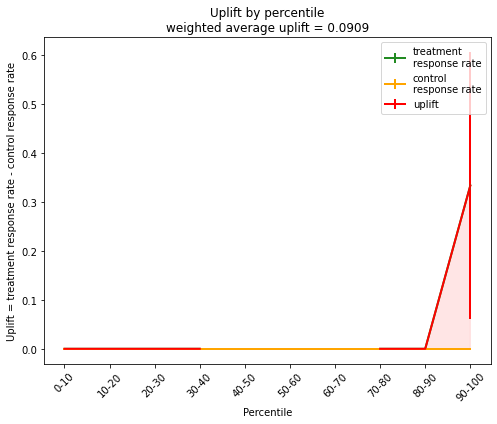

In [372]:
from sklift.viz import plot_uplift_by_percentile

# line plot
plot_uplift_by_percentile(y_val, uplift_ct, trmnt_val, strategy='overall', kind='line');

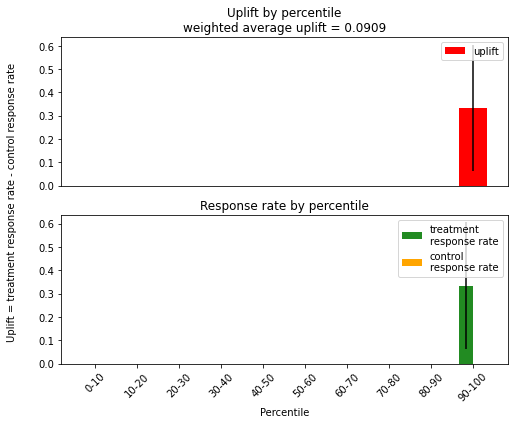

In [373]:
# bar plot
plot_uplift_by_percentile(y_val, uplift_ct, trmnt_val, strategy='overall', kind='bar');

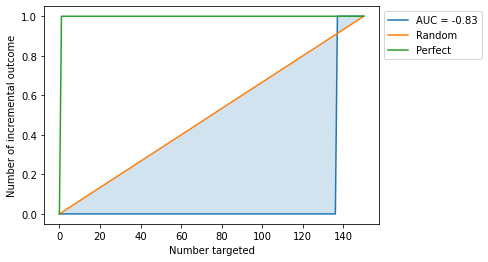

In [374]:

from sklift.viz import plot_qini_curve

# with ideal Qini curve (red line)
# perfect=True
plot_qini_curve(y_val, uplift_ct, trmnt_val, perfect=True);

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


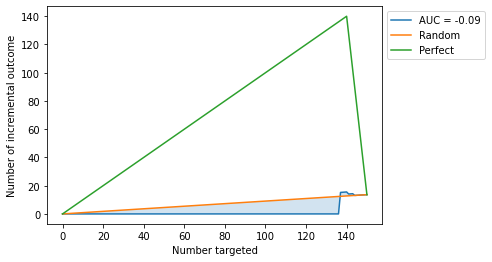

In [375]:
from sklift.viz import plot_uplift_curve

# with ideal curve
# perfect=True
plot_uplift_curve(y_val, uplift_ct, trmnt_val, perfect=True);

### LGBMClassifier

In [489]:
# conditional Independence Assumption:

 
# intuition: check if treatment was random

f1_micro = cross_val_score(
    X=X_train,
    y=y_train,
    estimator= LGBMClassifier(random_state=42, n_jobs=-1),
    scoring='f1_micro', 
    cv=3)

print(f'F1 micro {f1_micro.mean():.2f}')

C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


F1 micro 0.99


In [490]:
X = FX_indicators_2020_df.iloc[0:1000]

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [491]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,MSG_A,MSG_B,MOVED_ADMA_N,MOVED_ADMA_Y,MOVED_ADMB_N,MOVED_ADMB_Y
0,84508,3,0,25,4,0,0,38,39,38,...,1,4,0,1,0,0,0,0,0,0
1,608312,1,0,35,0,0,3,46,46,46,...,3,3,1,0,0,0,0,0,0,0
2,222821,3,0,73,3,0,0,42,36,48,...,2,14,1,0,0,0,0,0,0,0
3,137882,2,0,54,1,1,0,37,34,51,...,0,4,1,0,1,0,0,0,0,0
4,531303,2,0,51,0,3,0,46,46,46,...,3,3,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,381695,3,0,25,3,1,0,33,32,34,...,1,39,0,1,0,0,0,0,0,0
996,209001,3,0,84,2,0,0,53,51,54,...,0,1,0,1,0,1,0,0,0,0
997,335869,3,0,53,2,0,0,53,51,54,...,0,1,1,0,0,0,0,0,0,0
998,633658,1,0,30,1,0,1,36,36,37,...,1,3,1,0,0,0,0,0,0,0


In [492]:
treatment_B = FX_indicators_2020_df.loc[1:1000,'MSG_B']

target_B = FX_indicators_2020_df.loc[1:1000, 'MOVED_ADMB_Y']

treatment_A = FX_indicators_2020_df.loc[1:1000,'MSG_A']

target_A = FX_indicators_2020_df.loc[1:1000, 'MOVED_ADMA_Y']

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [493]:
# setting up data
# use test set for model evaluation after grid-search-cross-validation-tuning 
# use cv set for GridSearchCV

stratify_cols = pd.concat([treatment_B, target_B], axis=1)

X_cv, X_test, y_cv, y_test, trmnt_cv, trmnt_test = train_test_split(
    X,
    target_B,
    treatment_B,
    stratify=stratify_cols,
    test_size=0.2,
    random_state=42
)

#### Fit single model with treatment feature (S-Learner approach)

#### intuition: the model fits simultaneously on two groups with binary treatment flag as an additional user's feature. We score each object from the test sample twice: with the treatment flag equal to 1 and equal to 0. Subtracting the probabilities for each observation, we obtain an estimated uplift.

In [494]:
target_B

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1       0
2       0
3       0
4       0
5       0
       ..
996     0
997     0
998     0
999     0
1000    0
Name: MOVED_ADMB_Y, Length: 1000, dtype: uint8

In [495]:
treatment_B

1       0
2       0
3       0
4       0
5       0
       ..
996     1
997     0
998     0
999     1
1000    0
Name: MSG_B, Length: 1000, dtype: int64

In [496]:
# setting up model ...

estimator = LGBMClassifier(
    random_state=42,
    n_jobs=-1,
)

# ... metamodel ...
slearner = SoloModel(estimator=estimator)

# ... and uplift metric scorer to pass to cross validation
uplift_scorer = make_uplift_scorer("qini_auc_score", trmnt_cv)

In [497]:
cv_gen = StratifiedShuffleSplit(
    n_splits=3,
    random_state=42
)

cross_validate(slearner,    
               X=X_cv,
               y=y_cv,
               scoring=uplift_scorer,
               return_estimator=True,
               cv=cv_gen,
               n_jobs=-1,
               fit_params={'treatment': trmnt_cv}
)

{'fit_time': array([0.15112615, 0.15422034, 0.15125108]),
 'score_time': array([0.03028893, 0.01210141, 0.03022885]),
 'estimator': (SoloModel(estimator=LGBMClassifier(random_state=42)),
  SoloModel(estimator=LGBMClassifier(random_state=42)),
  SoloModel(estimator=LGBMClassifier(random_state=42))),
 'test_score': array([-0.18987342,  0.11392405, -0.44303797])}

In [498]:
grid = {
    'estimator__learning_rate': [0.2],
    'estimator__max_depth': [6]
}

grid_search = GridSearchCV(slearner,
                           param_grid=grid,
                           scoring=uplift_scorer,
                           n_jobs=-1,
                           cv=cv_gen,
                           return_train_score=True
                          )

grid_search = grid_search.fit(
    X=X_cv,
    y=y_cv,
    treatment=trmnt_cv
)

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [499]:
print(f"best qini score on grid search: {grid_search.best_score_:.4f}")
print(f"best params: {grid_search.best_params_}")

best qini score on grid search: 0.3418
best params: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 6}


C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [500]:

slearner.set_params(**grid_search.best_params_)

slearner.fit(
    X=X_cv, 
    y=y_cv, 
    treatment=trmnt_cv,
)

uplift_B = slearner.predict(X_test)

In [501]:
uplift_B

array([-2.08747253e-09,  4.77095628e-07,  1.30745282e-08,  3.12659128e-07,
        1.34046869e-06,  8.07239862e-07, -4.11192199e-07,  6.53639159e-08,
        1.47795247e-07,  9.04069697e-06,  2.46779826e-07,  2.88270479e-08,
        3.19019385e-05,  2.67025299e-09,  2.05900261e-09,  1.05018483e-07,
        7.49814084e-04,  1.48131352e-07,  4.38096115e-07,  2.12370996e-08,
        2.44844694e-07,  1.80824508e-08,  3.10377106e-04,  1.04642532e-06,
        1.65002672e-06,  8.43544255e-08,  4.00795678e-07,  1.55486218e-07,
        1.54831378e-05,  1.40812636e-07,  7.13759472e-08,  7.20826825e-07,
        1.63988055e-08, -1.50294069e-08,  1.77625169e-07,  1.09288827e-07,
        1.87765777e-05, -2.47317347e-07, -3.07901594e-07,  2.22540526e-05,
        9.38069791e-05,  2.03787653e-09,  3.07666589e-08,  7.10500699e-07,
        1.19265486e-07,  3.06352116e-03,  2.16091794e-08,  7.42707993e-09,
        3.99713850e-10,  7.71170832e-07,  9.79861632e-08,  4.17032345e-08,
        1.78850527e-05,  

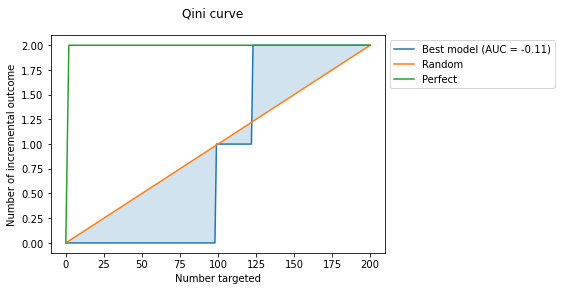

In [502]:

bets_disp = plot_qini_curve(y_test, uplift, trmnt_test, perfect=True, name='Best model');
bets_disp.figure_.suptitle("Qini curve");

In [503]:
# setting up data
# use test set for model evaluation after grid-search-cross-validation-tuning 
# use cv set for GridSearchCV

stratify_cols = pd.concat([treatment_A, target_A], axis=1)

X_cv, X_test, y_cv, y_test, trmnt_cv, trmnt_test = train_test_split(
    X,
    target_A,
    treatment_A,
    stratify=stratify_cols,
    test_size=0.2,
    random_state=42
)

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [504]:
# setting up model ...

estimator = LGBMClassifier(
    random_state=42,
    n_jobs=-1,
)

# ... metamodel ...
slearner = SoloModel(estimator=estimator)

# ... and uplift metric scorer to pass to cross validation
uplift_scorer = make_uplift_scorer("qini_auc_score", trmnt_cv)

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [505]:
cv_gen = StratifiedShuffleSplit(
    n_splits=3,
    random_state=42
)

cross_validate(slearner,    
               X=X_cv,
               y=y_cv,
               scoring=uplift_scorer,
               return_estimator=True,
               cv=cv_gen,
               n_jobs=-1,
               fit_params={'treatment': trmnt_cv}
)

{'fit_time': array([0.13991404, 0.14491367, 0.13292074]),
 'score_time': array([0.0179944 , 0.00900197, 0.01699758]),
 'estimator': (SoloModel(estimator=LGBMClassifier(random_state=42)),
  SoloModel(estimator=LGBMClassifier(random_state=42)),
  SoloModel(estimator=LGBMClassifier(random_state=42))),
 'test_score': array([0.4556962 , 0.92405063, 0.79746835])}

In [506]:
grid = {
    'estimator__learning_rate': [0.2],
    'estimator__max_depth': [6]
}

grid_search = GridSearchCV(slearner,
                           param_grid=grid,
                           scoring=uplift_scorer,
                           n_jobs=-1,
                           cv=cv_gen,
                           return_train_score=True
                          )

grid_search = grid_search.fit(
    X=X_cv,
    y=y_cv,
    treatment=trmnt_cv
)

C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [507]:
print(f"best qini score on grid search: {grid_search.best_score_:.4f}")
print(f"best params: {grid_search.best_params_}")

best qini score on grid search: 0.2110
best params: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 6}


C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


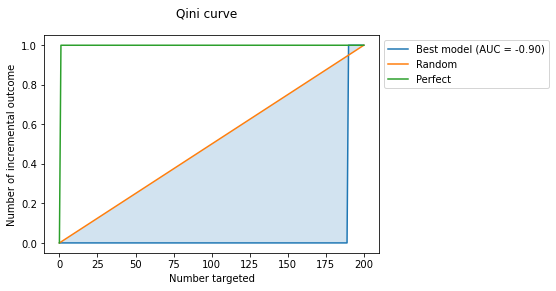

In [508]:
bets_disp = plot_qini_curve(y_test, uplift, trmnt_test, perfect=True, name='Best model');
bets_disp.figure_.suptitle("Qini curve");

In [511]:

slearner.set_params(**grid_search.best_params_)

slearner.fit(
    X=X_cv, 
    y=y_cv, 
    treatment=trmnt_cv,
)

uplift_A = slearner.predict(X_test)

In [516]:
uplift_A

array([ 1.20880706e-12,  2.04678793e-09, -4.95367149e-06,  2.00052899e-11,
        3.96174605e-12, -4.22308740e-09, -8.29201186e-08,  1.00340088e-12,
       -3.38556208e-08, -7.55389674e-08,  0.00000000e+00, -1.91019678e-08,
       -3.35217041e-08, -2.55302756e-09,  4.89812090e-13, -1.19577442e-08,
        1.99523533e-11,  7.10997938e-13,  1.64733256e-10, -7.45421058e-08,
       -1.69837171e-06, -3.17623117e-08, -2.86304445e-07, -6.06752627e-09,
        5.68649986e-12, -7.06368533e-09,  6.99277018e-11, -7.16509559e-08,
       -4.86508634e-10, -6.30836336e-07, -1.45462425e-10, -2.34522483e-10,
       -6.15374238e-12, -3.01803573e-08,  9.46335426e-12,  1.20873435e-12,
       -4.63566676e-09,  1.23670710e-12, -1.22902625e-08, -1.05881286e-07,
        5.68163669e-08, -6.02878053e-02, -6.17171223e-10, -2.60141201e-09,
       -8.21667589e-07, -5.21890250e-08, -7.81352892e-08, -3.28970560e-09,
       -3.58431820e-09,  4.31795975e-13, -3.63789780e-08,  9.84391420e-11,
       -9.71564330e-11, -

In [518]:
# first 100 voters for wo uplift models predicting how likely it is that a voter will become more likely to support the Democratic candidate based on the test mailings for message A and message B.

VOTER_ID_100= X_test.iloc[0:100, 0].reset_index(drop=True)

In [525]:
uplift_ct_A= pd.Series(uplift_ct_A).reset_index(drop=True)

In [528]:
uplift_ct_A

0      0.944674
1      0.965120
2      0.949018
3      0.965646
4      0.803209
         ...   
195    0.963261
196    0.905153
197    0.924747
198    0.925720
199    0.948296
Length: 200, dtype: float64

In [529]:

# Split dataset into training set and test set

from sklearn.model_selection import train_test_split

stratify_cols = pd.concat([treatment_B, target_B], axis=1)

X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split(
    X,
    treatment_B,
    target_B,
    stratify=stratify_cols,
    test_size=0.3,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (700, 26)
Validation shape: (300, 26)


In [530]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


C:\Users\Nirav\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [531]:
from sklift.models import ClassTransformation
from catboost import CatBoostClassifier

estimator = CatBoostClassifier(verbose=100, 
                               cat_features=cat_features,
                               random_state=42,
                               thread_count=1)

ct_model = ClassTransformation(estimator=estimator)

In [532]:

ct_model.fit(
    X=X_train, 
    y=y_train, 
    treatment=trmnt_train
)

Learning rate set to 0.008847
0:	learn: 0.6840452	total: 75.5ms	remaining: 1m 15s
100:	learn: 0.3130645	total: 3.45s	remaining: 30.7s
200:	learn: 0.2626510	total: 8.65s	remaining: 34.4s
300:	learn: 0.2433437	total: 15.4s	remaining: 35.7s
400:	learn: 0.2279892	total: 22s	remaining: 32.9s
500:	learn: 0.2133599	total: 28s	remaining: 27.9s
600:	learn: 0.1997293	total: 34.2s	remaining: 22.7s
700:	learn: 0.1863281	total: 41s	remaining: 17.5s
800:	learn: 0.1712415	total: 47.5s	remaining: 11.8s
900:	learn: 0.1565519	total: 54.9s	remaining: 6.03s
999:	learn: 0.1455369	total: 1m 2s	remaining: 0us


ClassTransformation(estimator=<catboost.core.CatBoostClassifier object at 0x0000024B85562C10>)

In [536]:
uplift_ct_B = ct_model.predict(X_test)

In [537]:
uplift_ct_B

array([0.88198301, 0.86061851, 0.87015066, 0.84313097, 0.93609974,
       0.8985344 , 0.84067784, 0.83072984, 0.87413902, 0.94370474,
       0.9101069 , 0.91491534, 0.90259743, 0.88076523, 0.93197326,
       0.93147723, 0.75209847, 0.86624618, 0.81640398, 0.87998706,
       0.93434883, 0.85177618, 0.86550628, 0.92808692, 0.89100131,
       0.82341892, 0.86170761, 0.8581192 , 0.91717597, 0.87678273,
       0.90764542, 0.88154824, 0.81152294, 0.88684551, 0.81575724,
       0.8899229 , 0.82337892, 0.85562839, 0.86559039, 0.92662951,
       0.89710174, 0.82243574, 0.80658462, 0.90688183, 0.92652992,
       0.82105088, 0.8777496 , 0.9116112 , 0.86091178, 0.91249462,
       0.93834032, 0.93643816, 0.84030194, 0.86530701, 0.77824823,
       0.854993  , 0.8565709 , 0.93412597, 0.88393277, 0.91342428,
       0.89644762, 0.84875351, 0.88745662, 0.90837927, 0.92317841,
       0.84916453, 0.8614941 , 0.87243996, 0.84871342, 0.8794581 ,
       0.9233464 , 0.82637723, 0.91647042, 0.89278313, 0.92251

In [539]:
uplift_ct_B =  pd.Series(uplift_ct_B).reset_index(drop=True)

In [540]:
uplift_ct_B

0      0.881983
1      0.860619
2      0.870151
3      0.843131
4      0.936100
         ...   
195    0.920143
196    0.947493
197    0.934018
198    0.888930
199    0.839502
Length: 200, dtype: float64

In [543]:
q6_df_voter_ID_modelscore_log_reg = pd.concat([VOTER_ID_100, uplift_ct_A, uplift_ct_B ], axis=1, 
                                              keys=["VOTER_ID_100", "uplift stong democrat messege_A", "uplift stong democrat messege_B"])

In [544]:
q6_df_voter_ID_modelscore_log_reg

,VOTER_ID_100,uplift stong democrat messege_A,uplift stong democrat messege_B
0,200717.0,0.944674,0.881983
1,481831.0,0.965120,0.860619
2,585921.0,0.949018,0.870151
3,351615.0,0.965646,0.843131
4,162394.0,0.803209,0.936100
...,...,...,...
195,NaN,0.963261,0.920143
196,NaN,0.905153,0.947493
197,NaN,0.924747,0.934018
198,NaN,0.925720,0.888930


In [548]:
q6_df_voter_ID_modelscore_log_reg.to_csv (r'C:\Users\Nirav\Desktop\pyjup\q6_df_voter_ID_modelscore_log_reg.csv', 
                                            index = False, header=True)

In [549]:
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
from dmba import plotDecisionTree
from sklearn import tree
from IPython.display import Image

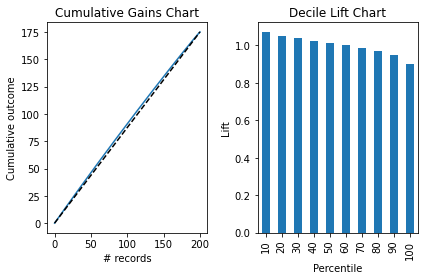

In [550]:
# code for generating cumulative gains and decile for Uplift_Catboost


pred_v = pd.Series(ct_model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()